![header](./img/header_with_kepler.png)

# COPERNICUS MARINE SEA ICE OBSERVATIONS ARCTIC TRAINING
# Comparison between observations and model outputs
<div style="text-align: right"><i> 11-01-SEA-ICE </i></div>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***

# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. About the data](#2.-About-the-data)
  - [2.1. Model product](#2.1.-Model-product)
  - [2.2. Satellite observation product](#2.2.-Satellite-observation-product)
  - [2.3. Get more info on the Observation product](#2.3.-Get-more-info-on-the-Observation-product)
  - [2.4. Parameters used for downloading the data](#2.4.-Parameters-used-for-downloading-the-data)
- [3. Required Python modules](#3.-Required-Python-modules)
- [4. Explore the netCDF file content](#4.-Explore-the-netCDF-file-content)
- [5. Exercise 1: Map the data at given dates](#5.-Exercise-1:-Map-the-data-at-given-dates)
    - [5.1. Select the netCDF file and variable name](#5.1.-Select-the-netCDF-file-and-variable-name)
    - [5.2. Open and store the file variables of interest](#5.2.-Open-and-store-the-file-variables-of-interest)
    - [5.3. Generate, show and save the plots](#5.3.-Generate,-show-and-save-the-plots) 
        - [5.3.1. Preparation of the data to be plotted](#5.3.1.-Preparation-of-the-data-to-be-plotted)
        - [5.3.2. Plot the data](#5.3.2.-Plot-the-data)
- [6. Exercise 2: Comparison of sea ice fraction between model and observation](#6.-Exercise-2:-Comparison-of-sea-ice-fraction-between-model-and-observation)
    - [6.1. Comparison from January to November 2019](#6.1.-Comparison-from-January-to-November-2019)
        - [6.1.1 Select the netCDF file and variable name](#6.1.1.-Select-the-netCDF-file-and-variable-name)
        - [6.1.2. Open and store the file variables of interest](#6.1.2.-Open-and-store-the-file-variables-of-interest)
        - [6.1.3. Generate, show and save the plots](#6.1.3.-Generate,-show-and-save-the-plots) 
    - [6.2. Comparison in August 2019](#6.2.-Comparison-in-August-2019)
        - [6.2.1 Select the netCDF file and variable name](#6.2.1.-Select-the-netCDF-file-and-variable-name)
        - [6.2.2. Open and store the file variables of interest](#6.2.2.-Open-and-store-the-file-variables-of-interest)
        - [6.2.3. Generate, show and save the plots](#6.2.3.-Generate,-show-and-save-the-plots) 
            - [6.2.3.1. Plot with the two observation products and model](#6.2.3.1.-Plot-with-the-two-observation-products-and-model)
            - [6.2.3.2. Plot with the second observation product and model](6.2.3.2.-Plot-with-the-second-observation-product-and-model)
- [7. Conclusion](#7.-Conclusion)

# 1. Introduction
[Go back to the "Table of contents"](#Table-of-contents)

The Arctic covers a vast area, most of it being uninhabited. The human infrastructures there are scarce and are certainly not spread enough to monitor precisely this rapidly changing environment. The <a href="../02 Jupyter Notebook - Phy model Products/02-01-PHY-maps.ipynb"> Notebook on CMEMS physical model products </a> highlighted the great seasonal and annual variations of sea-ice state parameters in the Arctic Ocean. As the region is warming up twice as fast as the rest of the world, it requires a more intense monitoring. Models also need reliable observations as inputs to provide the most accurate estimations. This is where space based technologies have a key role to play. They constitute a powerful tool to observe this particularly remote area on a daily basis.

This notebook introduces you to the manipulation of the **CMEMS sea ice observation products** and how they compare to the model products. In this notebook, you will learn:
- [to handle and explore NetCDF files](#4.-Explore-the-netCDF-file-content);
- [to map and compare sea ice fraction estimates from model and observation products](#6.-Exercise-2:-Comparison-of-sea-ice-fraction-between-model-and-observation).

# 2. About the data
[Go back to the Table of contents](#Table-of-contents)

## 2.1. Model product
The model products we will use during this session are further described in the <a href="../02 Jupyter Notebook - Phy model Products/02-01-PHY-maps.ipynb"> Notebook on CMEMS physical model products </a> and on the [CMEMS website](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=ARCTIC_REANALYSIS_PHYS_002_003).

## 2.2. Satellite observation product

We will focus on the [SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002) product.

The operational sea ice services at MET Norway and DMI provide ice charts of the Arctic area covering Baffin Bay, Greenland Sea, Fram Strait and Barents Sea. The charts show the ice concentration. The three different types of ice charts (datasets) are produced from twice to several times a week: 
* METNO charts are produced every weekday;
* DMI regional charts are produced daily at irregular intervals;
* A supplemental DMI overview chart is produced twice weekly.

<img src="./img/ARCTIC_OCEAN_OBS_011_002.png">

In particular, as explained above there are 3 different products:
* **METNO-ARC-SEAICE_CONC-L4-NRT-OBS :**
    * lon: [-80 to 85]  
    * lat: [54 to 88]  
    * time: January 2018 until now
    * produced daily


* **DMI-ARC-SEAICE_CONC-L4-NRT-OBS :**
    * lon: [-105 to 23]  
    * lat: [54 to 85]  
    * time: January 2018 until now 
    * Produced daily at irregular intervals
    

* **DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS :**
    * lon: [-105 to 23]  
    * lat: [54 to 85]  
    * time: January 2018 until now
    * Produced twice a week


## 2.3. Get more info on the Observation product
1. You can find more info on this product and access to the download services in the [dedicated Product Page on Copernicus Marine (CMEMS) Web portal](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002)
<br><br>
2. For detailed information about the product, please read the [Product User Manual (PUM)](./docs/ProductUserManuals/CMEMS-SI-PUM-011-002.pdf)
<br><br>
3. For information about the quality of the product, please read the [Quality Information Document (QUID)](./docs/QualityInformationDocuments/CMEMS-SI-QUID-011-001to007-009to014.pdf)

## 2.4. Parameters used for downloading the data

The products used throughout the notebook have been downloaded ahead of the training session and are stored in the `data/` folder.

If you wish to download the data yourself, please be sure to have CMEMS User credentials. Otherwise you can get them <a href="http://marine.copernicus.eu/services-portfolio/register-now/" target="_blank">here</a>.

Moreover, you will find below the parameters used to download each dataset from the CMEMS portal:
- **dataset-ran-arc-myoceanv2-be_1605565080783.nc :**   dimension (depth:12, time:12, x:609, y: 881) -> monthly means for year 2019 (model product)

- **DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683.nc :**   dimension (time: 94, x: 2232, y: 2413) -> twice a week means for year 2019

- **METNO-ARC-SEAICE_CONC-L4-NRT-OBS_1602232339232.nc:** dimension(time: 22, x:3812, y:2980) -> daily for August 2019



<div class="alert alert-block alert-warning">

<b> TIP </b>

***Tutorial on product downloading***

If you need guidance about the different services for downloading CMEMS products, please check this [tutorial](
https://marine.copernicus.eu/tutorials/how-to-download-products-service-release-septembre-2015/)

# 3. Required Python modules
[Go back to the Table of contents](#Table-of-contents)

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **os** | [operating system interfaces](https://docs.python.org/3.7/library/os.html) (manage paths, create directories...) |
| **numpy** | [NumPy](https://numpy.org/) allows carrying out scientific computing with Python and managing ND-arrays |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) handles netCDF files in an intuitive and interactive way. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python numerical plotting library |
| **basemap** |[The basemap toolkit](https://matplotlib.org/basemap/) is a library for plotting 2D data on maps. |

In [1]:
#### Import libraries ####
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import warnings
warnings.filterwarnings('ignore')

### Install the needed Python modules (for local installation, can be skipped during Training)

The requested python librairies have been installed on the CMEMS JupyterHub ahead of this training session. Hence no installation is needed during the session. If you wish to replay this notebook later on your own infrastructure, you may need to check your python version and install the python librairies used in this Notebook. The following part gives you hints on setting up the approriate environment for this Notebook to run smoothly.

**Requirement: Python version 3.7**

Check your Python version:

In [2]:
!python --version

Python 3.7.3


If needed you can install the right Python version in this way:
```
conda install python=3.7
```

If you are using the standard *Anaconda3* installation, you can install the needed modules executing the following command in a new cell:
```
conda install numpy xarray matplotlib basemap netcdf4 basemap-data-hires
```

Then, as requested, please restart the kernel.

The kernel maintains the state of a notebook's computations. You can reset this state by restarting the kernel. This is done by clicking on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> in the toolbar above.

# 4. Explore the netCDF file content
 [Go back to the "Table of contents"](#Table-of-contents)
 
 We are going to work with the observation products over the Arctic Ocean [SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002).  

We are going to use the file **DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683.nc** to get started with Python features.


To start we will define:
- `RootPath`: the path pointing to the data directory
- `FName`: the path of the NetCDF file (`Rootpath`+filename.nc) 

These variables can of course be changed later on depending on the netCDF filename and where the data is stored. 

In [3]:
### Define your data directory Rootpath and your filename FName
RootPath = 'data/'
FName = RootPath + 'DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683.nc'

Now that we have told Jupyter which data we are going to work with and where it is, we need to open this data.
The following cell opens the netCDF file (`xr.open_dataset()` function) and allows you to interactively browse the content of the file. 

In [4]:
### Open and browse the file
xr.open_dataset(FName)

<xarray.Dataset>
Dimensions:            (time: 94, xc: 2232, yc: 2413)
Coordinates:
  * yc                 (yc) float32 -2941677.8 -2940677.8 ... -529677.75
    lon                (yc, xc) float32 ...
  * xc                 (xc) float32 -923125.7 -922125.7 ... 1306874.2 1307874.2
  * time               (time) datetime64[ns] 2019-01-02T12:00:00 ... 2019-11-27T12:00:00
    lat                (yc, xc) float32 ...
Data variables:
    ice_concentration  (time, yc, xc) float32 ...
    crs                |S1 ...
Attributes:
    title:                                             Arctic Greenland Ice C...
    Conventions:                                       CF-1.4
    FROM_ORIGINAL_FILE__netcdf_version_id:             3.6.3
    creation_date:                                     2020-08-20T11:46:15Z
    produced_date:                                     2020-08-19T12:00:00Z
    valid_date:                                        2020-08-19T12:00:00Z
    FROM_ORIGINAL_FILE__product_version:               1.0
    FROM_ORIGINAL_FILE__software_version:              1.0
    comment:                                           The ice concentration ...
    satellite:                                         NA
    sensor:                                            SAR
    FROM_ORIGINAL_FILE__spatial_resolution_latitude:   1000.0
    FROM_ORIGINAL_FILE__spatial_resolution_longitude:  1000.0
    FROM_ORIGINAL_FILE__southernmost_latitude:         54.629
    FROM_ORIGINAL_FILE__northernmost_latitude:         85.239235
    FROM_ORIGINAL_FILE__westernmost_longitude:         -105.15334
    FROM_ORIGINAL_FILE__easternmost_longitude:         22.95248
    FROM_ORIGINAL_FILE__field_type:                    daily
    institution:                                       DMI
    institution_references:                            http://www.dmi.dk
    contact:                                           iskort@dmi.dk
    operational_status:                                operational
    _CoordSysBuilder:                                  ucar.nc2.dataset.conv....
    references:                                         
    source:                                             
    history:                                           Data extracted from da...

You can access the **attributes** of a variable by clicking on the **Show/Hide Attribute button** and you can access the **data representation** of a variable by clicking on the **Show/Hide data repr button**. Both buttons are located in the most right column of the product browser.

Now, to store the file content into an xarray Dataset `FIn` and print the content of the dataset, you need to execute the following cell:

In [5]:
#### Open the netCDF file with xr.open_dataset() and get general information ####

## File
FIn = xr.open_dataset(FName);   #Handling of the netCDf file

# Show Header: global attributes
FIn.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:            (time: 94, xc: 2232, yc: 2413)
Coordinates:
  * yc                 (yc) float32 -2941677.8 -2940677.8 ... -529677.75
    lon                (yc, xc) float32 ...
  * xc                 (xc) float32 -923125.7 -922125.7 ... 1306874.2 1307874.2
  * time               (time) datetime64[ns] 2019-01-02T12:00:00 ... 2019-11-27T12:00:00
    lat                (yc, xc) float32 ...
Data variables:
    ice_concentration  (time, yc, xc) float32 ...
    crs                |S1 ...
Attributes:
    title:                                             Arctic Greenland Ice C...
    Conventions:                                       CF-1.4
    FROM_ORIGINAL_FILE__netcdf_version_id:             3.6.3
    creation_date:                                     2020-08-20T11:46:15Z
    produced_date:                                     2020-08-19T12:00:00Z
    valid_date:                                        2020-08-19T12:00:00Z
    FROM_ORIGIN

A NetCDF file is a common way of storing scientific data. 
It contains:
- The **dimensions** of the data (here time, depth, latitude and longitude);
- Several **variables** depending on one or more of these dimensions;
- General information about the product (**global attributes**).

In [6]:
####  If you want to store one attribute in a variable (for example "institution"):
institution=FIn.attrs['institution']
print(institution)

DMI


In [7]:
###  Print the different variables of a netCDF file ###
FIn.data_vars

Data variables:
    ice_concentration  (time, yc, xc) float32 ...
    crs                |S1 ...

This function displays all the available variables in one product along with the dimensions they depend on and their data type (`float32` here, meaning that each values is a float coded on 32 bits). You can see that the present variables in the files depend on several coordinates. To get information about these coordinates:

In [8]:
### Print the coordinates of a netCDF file ###
FIn.coords

Coordinates:
  * yc       (yc) float32 -2941677.8 -2940677.8 ... -530677.75 -529677.75
    lon      (yc, xc) float32 ...
  * xc       (xc) float32 -923125.7 -922125.7 -921125.7 ... 1306874.2 1307874.2
  * time     (time) datetime64[ns] 2019-01-02T12:00:00 ... 2019-11-27T12:00:00
    lat      (yc, xc) float32 ...

In [9]:
###  Print the dimensions of a netCDF file ###
FIn.dims

Frozen(SortedKeysDict({'time': 94, 'yc': 2413, 'xc': 2232}))

If you want to store the values of a variable in an array, type `MyArray = FIn.variable.values`. For example the time variable:


In [10]:
### Store only the values in a variable ###
VarTime=FIn.time.values

If you want to check the content of `Myarray` type `print(Myarray)`. For example for `VarTime`:

In [11]:
###  Print the content of the array variable ###
print(VarTime)

['2019-01-02T12:00:00.000000000' '2019-01-06T12:00:00.000000000'
 '2019-01-09T12:00:00.000000000' '2019-01-13T12:00:00.000000000'
 '2019-01-16T12:00:00.000000000' '2019-01-20T12:00:00.000000000'
 '2019-01-23T12:00:00.000000000' '2019-01-28T12:00:00.000000000'
 '2019-01-30T12:00:00.000000000' '2019-02-03T12:00:00.000000000'
 '2019-02-06T12:00:00.000000000' '2019-02-10T12:00:00.000000000'
 '2019-02-13T12:00:00.000000000' '2019-02-17T12:00:00.000000000'
 '2019-02-20T12:00:00.000000000' '2019-02-24T12:00:00.000000000'
 '2019-02-27T12:00:00.000000000' '2019-03-03T12:00:00.000000000'
 '2019-03-06T12:00:00.000000000' '2019-03-10T12:00:00.000000000'
 '2019-03-13T12:00:00.000000000' '2019-03-17T12:00:00.000000000'
 '2019-03-20T12:00:00.000000000' '2019-03-24T12:00:00.000000000'
 '2019-03-27T12:00:00.000000000' '2019-03-31T12:00:00.000000000'
 '2019-04-03T12:00:00.000000000' '2019-04-07T12:00:00.000000000'
 '2019-04-10T12:00:00.000000000' '2019-04-14T12:00:00.000000000'
 '2019-04-17T12:00:00.000

Here, you can see that the dataset contains the variable values twice a week for each week from January to November 2019.

Another way of displaying raw information about the NetCDF file is to use the `ncdump -h`command.

<div class="alert alert-block alert-warning">
    
**TIPS**  
When calling a linux command from a notebook, insert a `!` at the beginning of the command line.

In [12]:
### Use a linux command line to display information about the NetCDF file
!ncdump -h $FName

netcdf DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683 {
dimensions:
	xc = 2232 ;
	yc = 2413 ;
	time = 94 ;
	crs_strlen = 1 ;
variables:
	short ice_concentration(time, yc, xc) ;
		ice_concentration:long_name = "sea ice concentration" ;
		ice_concentration:standard_name = "sea_ice_area_fraction" ;
		ice_concentration:units = "%" ;
		ice_concentration:coordinates = "lon lat" ;
		ice_concentration:grid_mapping = "crs" ;
		ice_concentration:source = "DMI" ;
		ice_concentration:_FillValue = -99s ;
		ice_concentration:scale_factor = 1.f ;
		ice_concentration:add_offset = 0.f ;
	char crs(crs_strlen) ;
		crs:grid_mapping_name = "polar_stereographic" ;
		crs:false_easting = 0.f ;
		crs:false_northing = 0.f ;
		crs:proj4_string = " +a=6371000 +b=6371000 +lat_ts=90 +lon_0=-45 +proj=stere +lat_0=90" ;
		crs:straight_vertical_longitude_from_pole = "-45" ;
		crs:latitude_of_projection_origin = "90" ;
		crs:standard_parallel = "90" ;
		crs:_CoordinateTransformType = "Projection" ;
		crs:_Coordi

As you can see, the `ncdump -h`command line displays the same kind of information as `xr_dataset.info` python code.
A difference worth to be noted is that in the analysis products over the Arctic Ocean, the command line shows that the time variable is stored as `seconds since 1981-01-01 00:00:00`. This unit is not easily readable by a human. `xr.open_dataset` conveniently interprets the time coordinate as a date YYYY-MM-DDTHH:mm:ss when ingesting the product.

# 5. Exercise 1: Map the data at given dates
[Go back to the "Table of contents"](#Table-of-contents)

Now that we have learned how to open and manipulate a NetCDF file, it would be nice to visualize the content of the product onto a map. The variables of interest in the studied dataset are geographical variables. This exercise will show you how to map the sea ice fraction in winter and summer.

## 5.1. Select the netCDF file and variable name

In this exercise, we will have a closer look at the **sea ice concentration**. We need to define the name of the variable of interest in the netCDF file:

In [13]:
## Define the path of the file to open 
RootPath = 'data/'

# Physical model file
FName = RootPath + 'DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683.nc'  

# To see the Path of the NetCDF file
print(FName)

data/DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683.nc


In [14]:
## Open the netCDF file with xr.open_dataset and store the dataset in FIn
FIn = xr.open_dataset(FName);

# show the content of the variable 'FIn':
FIn

<xarray.Dataset>
Dimensions:            (time: 94, xc: 2232, yc: 2413)
Coordinates:
  * yc                 (yc) float32 -2941677.8 -2940677.8 ... -529677.75
    lon                (yc, xc) float32 ...
  * xc                 (xc) float32 -923125.7 -922125.7 ... 1306874.2 1307874.2
  * time               (time) datetime64[ns] 2019-01-02T12:00:00 ... 2019-11-27T12:00:00
    lat                (yc, xc) float32 ...
Data variables:
    ice_concentration  (time, yc, xc) float32 ...
    crs                |S1 ...
Attributes:
    title:                                             Arctic Greenland Ice C...
    Conventions:                                       CF-1.4
    FROM_ORIGINAL_FILE__netcdf_version_id:             3.6.3
    creation_date:                                     2020-08-20T11:46:15Z
    produced_date:                                     2020-08-19T12:00:00Z
    valid_date:                                        2020-08-19T12:00:00Z
    FROM_ORIGINAL_FILE__product_version:               1.0
    FROM_ORIGINAL_FILE__software_version:              1.0
    comment:                                           The ice concentration ...
    satellite:                                         NA
    sensor:                                            SAR
    FROM_ORIGINAL_FILE__spatial_resolution_latitude:   1000.0
    FROM_ORIGINAL_FILE__spatial_resolution_longitude:  1000.0
    FROM_ORIGINAL_FILE__southernmost_latitude:         54.629
    FROM_ORIGINAL_FILE__northernmost_latitude:         85.239235
    FROM_ORIGINAL_FILE__westernmost_longitude:         -105.15334
    FROM_ORIGINAL_FILE__easternmost_longitude:         22.95248
    FROM_ORIGINAL_FILE__field_type:                    daily
    institution:                                       DMI
    institution_references:                            http://www.dmi.dk
    contact:                                           iskort@dmi.dk
    operational_status:                                operational
    _CoordSysBuilder:                                  ucar.nc2.dataset.conv....
    references:                                         
    source:                                             
    history:                                           Data extracted from da...

In [15]:
## Define the name of the variables of interest for the exercise (as define in the output cell above)
VarName='ice_concentration'

## 5.2. Open and store the file variables of interest

In order to plot the variables of interest, we will need the `time` coordinate but also the `latitude` and `longitude` coordinates and variables. This is the purpose of the following cell:

In [16]:
## Store the variables of interest in individual arrays
#Get the variable VarName and associated coordinates and attributes
Var=FIn[VarName]

# Define latitude and longitude in a variable
Lat=np.squeeze(FIn['lat'])
Lon=np.squeeze(FIn['lon'])
TIME=FIn['time']

We close the dataset `FIn` to spare memory:

In [17]:
## Close the FIn dataset to free memory
FIn.close()

## 5.3. Generate, show and save the plots

As previously shown, the dataset contains sea ice concentration values twice a week for the whole 2019 year. In this exercise, we will plot the variable of interest for :
- March 10th 2019
- August 11th 2019

You can try plotting different dates after the exercise if you want.

### 5.3.1. Preparation of the data to be plotted

In this cell we first need to define:
- The variable of interest
- `Date_plot1` and `Date_plot2`: the dates to plot with a format compatible with `TIME`.

Then `xr.sel()` selects the `nearest` dates to `Date_plot1` or `Date_plot2` in the time variable of the `Var` dataset.

In [18]:
# Define the dates to plot (YYYY-MM-DDTHH-mm-ss)
Date_plot1='2019-03-10T00:00:00'
Date_plot2='2019-08-11T00:00:00'

# Extract the data corresponding to these dates
# Date selection and print the content of the resulting data array
Var_date1=Var.sel(time=Date_plot1, method='nearest')
print('Selected date1 to plot:', Var_date1.time.values)


Var_date2=Var.sel(time=Date_plot2, method='nearest')
print('Selected date2 to plot:', Var_date2.time.values)
print('The dimension of variable Var_data2 is: {}'.format(Var_date2.dims))

Selected date1 to plot: 2019-03-10T12:00:00.000000000
Selected date2 to plot: 2019-08-11T12:00:00.000000000
The dimension of variable Var_data2 is: ('yc', 'xc')


`Var_date1`and `Var_date2`now respectively only contain the `VarName` variable for the selected `Date_plot1` and `Date_plot2` dates. If you want to select a date that is not in the dataset, then `xr.sel()` selects the nearest date in the DataArray. You can also note that the `VarName` variable does not depend on the time dimension anymore! As there was only one remaining date per dataset, the `sel` method automatically removed the time dependency of the `VarName` variable.

As we saw earlier, `xr.open_dataset` interprets the time variable as a date. The precision of this date (ns) is too high as we are looking up monthly average values. It would be more practical to work with date object of the type YYYY-MM-DD. To do so, we can use the astype('datetime64[unit]') function as set out in the cell below. We will use the day [D] time unit here. 

<div class="alert alert-block alert-warning">
    
**TIPS**  
You can also use other units according to your application. The date units are years (`[Y]`), months (`[M]`), weeks (`[W]`),  while the time units are hours (`[h]`), minutes (`[m]`), seconds (`[s]`) and milliseconds (`[ms]`)

In [19]:
### Use of astype():

date1=Var_date1.time.values.astype('datetime64[D]')
print('Var_date1 down to ns:',Var_date1.time.values)
print('date1 down to days with astype() function:',date1)
date2=Var_date2.time.values.astype('datetime64[D]')

Var_date1 down to ns: 2019-03-10T12:00:00.000000000
date1 down to days with astype() function: 2019-03-10


### 5.3.2. Plot the data

This cell uses the `plt.subplots()` function to plot the data for both dates on the same figure with one subplot per figure.  
A subplot is called an `axe`and each axe property can be defined independently.  

For plotting over the Arctic, we will use the ` Basemap npstere` projection which is the North-Polar Stereographic projection and corresponds to the stereographic projection used in the product. We also define the following parameters:
* `lon_0`: center of desired map domain
* `ax`: axe on which to create the basemap instance
* `boundinglat`: bounding latitude for pole-centered projections (npstere,spstere,nplaea,splaea,npaeqd,spaeqd). These projections are square regions centered on the north or south pole. The longitude lon_0 is at 6-o’clock, and the latitude circle boundinglat is tangent to the edge of the map at lon_0.
* `resolution`: resolution of boundary database to use

You can play around with these parameters later on and see how it affects the map!

We will plot the variable using the `matplotlib.pcolormesh` function which creates a pseudocolor plot with a rectangular grid.

Save file: out/plot_sea_ice_coverage_DMI_2019-03-10_to_2019-08-11.png


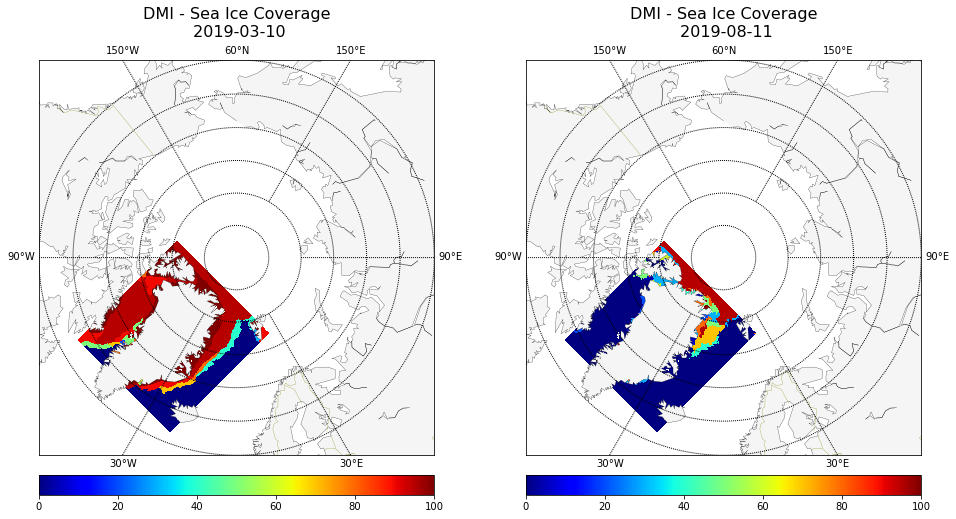

In [22]:
fig,(axe1,axe2) = plt.subplots(1,2, figsize=(16,8)) # 16 is width, 8 is height

### Plot the first date

# create a Basemap
m = Basemap(projection='npstere', lon_0=0.,ax=axe1, boundinglat=60,resolution='c')

# Draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25, color='olive')
m.fillcontinents(color='whitesmoke')

# Draw parallels & meridians
m.drawmeridians(np.arange(30,360,60),labels=[1,1,1,1])
m.drawparallels(np.arange(60,90,5),labels=[1,1,1,1])

# plot the first date
im1 = m.pcolormesh(Lon.values,Lat.values,Var_date1,shading='flat',cmap=plt.cm.jet,latlon=True)
#im1.set_clim(vmin=Minvalue, vmax=Maxvalue)

# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="5%")

# add a title.
plt.title( 'DMI - Sea Ice Coverage' '\n'   ' {}' '\n'.format(date1),fontsize=16)


### Plot the second date

# create a Basemap
m2 = Basemap(projection='npstere', lon_0=0.,ax=axe2, boundinglat=60,resolution='c')

# Draw coastlines, country boundaries, fill continents.
m2.drawcoastlines(linewidth=0.25)
m2.drawcountries(linewidth=0.25, color='olive')
m2.fillcontinents(color='whitesmoke')



# Draw parallels & meridians
m2.drawmeridians(np.arange(30,360,60),labels=[1,1,1,1])
m2.drawparallels(np.arange(60,90,5),labels=[1,1,1,1])

# plot the second date
im2 = m2.pcolormesh(Lon.values,Lat.values,Var_date2,shading='flat',cmap=plt.cm.jet,latlon=True)
#im2.set_clim(vmin=Minvalue, vmax=Maxvalue)

# add colorbar
cb = m2.colorbar(im2,"bottom", size="5%", pad="5%")

# add a title.
plt.title( 'DMI - Sea Ice Coverage' '\n'   ' {}' '\n'.format(date2),fontsize=16)

#Save file
FOutName = 'out/plot_sea_ice_coverage_DMI_{}_to_{}.png'.format(date1,date2)
print('Save file:', FOutName)
plt.savefig(FOutName)

plt.show()

<div class="alert alert-block alert-info">
We just generated two maps of the sea ice coverage from the DMI product for March and August 2019. Both maps highlight the variablity of the sea ice extent over the year. You can see that the geographic coverage of the DMI product is limited to the Greenland coastal waters.

You can repeat the analysis for different dates by changing the `Date_plot` in section **[5.3.1.](#5.3.1.-Preparation-of-the-data-to-be-plotted)**

# 6. Exercise 2: Comparison of sea ice fraction between model and observation
[Go back to the "Table of contents"](#Table-of-contents)

In this part, we will compare monthly means of sea ice fraction between three products. 

- First of all we will plot and compare from January to November 2019:
    - [ARCTIC_REANALYSIS_PHYS_002_003](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=ARCTIC_REANALYSIS_PHYS_002_003): model product
    - [SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002) -> DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS


- Then we will plot and compare in August 2019:
    - [ARCTIC_REANALYSIS_PHYS_002_003](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=ARCTIC_REANALYSIS_PHYS_002_003): model product
    - [SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002) -> DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS
    - [SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002](https://resources.marine.copernicus.eu/?option=com_csw&view=details&product_id=SEAICE_ARC_SEAICE_L4_NRT_OBSERVATIONS_011_002) -> METNO-ARC-SEAICE_CONC-L4-NRT-OBS

## 6.1. Comparison from January to November 2019

### 6.1.1. Select the netCDF file and variable name

In [23]:
#### Netcdf file

RootPath = 'data/'

# Files
FNameModel = RootPath + 'dataset-ran-arc-myoceanv2-be_1605565080783.nc'
FNameObs=RootPath + 'DMI-ARC-SEAICE_CONC_OVERVIEW-L4-NRT-OBS_1598264517683.nc'

#  Variable Name
VarNameFice='fice'      # sea ice fraction
VarNameFice_obs='ice_concentration'

## Open the netCDF file with xr.open_dataset and store the dataset in FIn
FInModel = xr.open_dataset(FNameModel);
FInObs = xr.open_dataset(FNameObs);

# Create output dir to save plots
PathOut = 'out/comparison_obs_model'
if not os.path.exists(PathOut):
    os.makedirs(PathOut)
print('PLOTS FOLDER:', PathOut)


PLOTS FOLDER: out/comparison_obs_model


### 6.1.2. Open and store the file variables of interest

In order to plot the variables of interest, we will need the `time` coordinate but also the `latitude` and `longitude` coordinates and the 'Fice' variable from both model and observation products. We already stored the `time` coordinate in `VarTime`. We are doing it again in the following cell:

In [24]:
## Store the variables of interest in individual arrays
#Get the variable VarName and associated coordinates and attributes

VarFiceModel=FInModel[VarNameFice] # for Model
VarFiceObs=FInObs[VarNameFice_obs] # for Obs

In the code cell below, we store the content of the `latitude`,`longitude` variables in `Lat`, `Lon` for both model and observation:

In [25]:
# Define latitude and longitude in a variable
# for Model
LatModel=np.squeeze(FInModel['latitude'])
LonModel=np.squeeze(FInModel['longitude'])

# for Observation
LatObs=np.squeeze(FInObs['lat'])
LonObs=np.squeeze(FInObs['lon'])


We close the datasets `FInModel` and `FInObs` to spare memory:

In [26]:
## Close the FIn dataset to spare memory
FInModel.close()
FInObs.close()

### Monthly means for observation data

As explained earlier, the DMI Model product contains twice a week mean values of sea ice concentration:

In [27]:
VarFiceObs.time.values

array(['2019-01-02T12:00:00.000000000', '2019-01-06T12:00:00.000000000',
       '2019-01-09T12:00:00.000000000', '2019-01-13T12:00:00.000000000',
       '2019-01-16T12:00:00.000000000', '2019-01-20T12:00:00.000000000',
       '2019-01-23T12:00:00.000000000', '2019-01-28T12:00:00.000000000',
       '2019-01-30T12:00:00.000000000', '2019-02-03T12:00:00.000000000',
       '2019-02-06T12:00:00.000000000', '2019-02-10T12:00:00.000000000',
       '2019-02-13T12:00:00.000000000', '2019-02-17T12:00:00.000000000',
       '2019-02-20T12:00:00.000000000', '2019-02-24T12:00:00.000000000',
       '2019-02-27T12:00:00.000000000', '2019-03-03T12:00:00.000000000',
       '2019-03-06T12:00:00.000000000', '2019-03-10T12:00:00.000000000',
       '2019-03-13T12:00:00.000000000', '2019-03-17T12:00:00.000000000',
       '2019-03-20T12:00:00.000000000', '2019-03-24T12:00:00.000000000',
       '2019-03-27T12:00:00.000000000', '2019-03-31T12:00:00.000000000',
       '2019-04-03T12:00:00.000000000', '2019-04-07

To compare the oservation to the model values, they need to be on the same temporal resolution. We are going to resample the observation product down to a monthly mean. To compute the monthly average out of weekly values, we are going to use the `xr.dataSet.resample()` function. This functions returns a resampled object. It handles both downsampling and upsampling. The resampled dimension must be a datetime-like coordinate. Here we will generate the monthly mean by using the `time='m'` argument.

In [28]:
VarFiceObs_means = VarFiceObs.resample(time='m').mean()

Let's check the new time dimension of the observation variables:

In [29]:
VarFiceObs_means.time.values

array(['2019-01-31T00:00:00.000000000', '2019-02-28T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-04-30T00:00:00.000000000',
       '2019-05-31T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-07-31T00:00:00.000000000', '2019-08-31T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-10-31T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000'], dtype='datetime64[ns]')

As expected, we obtain a dataset with 11 monthly-mean time frames as the original dataset spanned from January to November 2019.

### 6.1.3. Generate, show and save the plots

The cell below generates a figure with two columns of eleven rows (one row per date). The sea ice concentration maps generated from the model products are displayed on the axes with even indices (right column) and the ones generated from the observation products are displayed on the axes with odd indices (left column).

To automate the subplot generation, we loop on the dates.

In [30]:
# Define the plotting window to center on Greenland
LatMinPlt = 60
LatMaxPlt = 80
LonMinPlt = -65
LonMaxPlt = 20        

Save file: out/comparison_obs_model/plot_Sea Ice Fraction_Model_&_Obs_2019.png


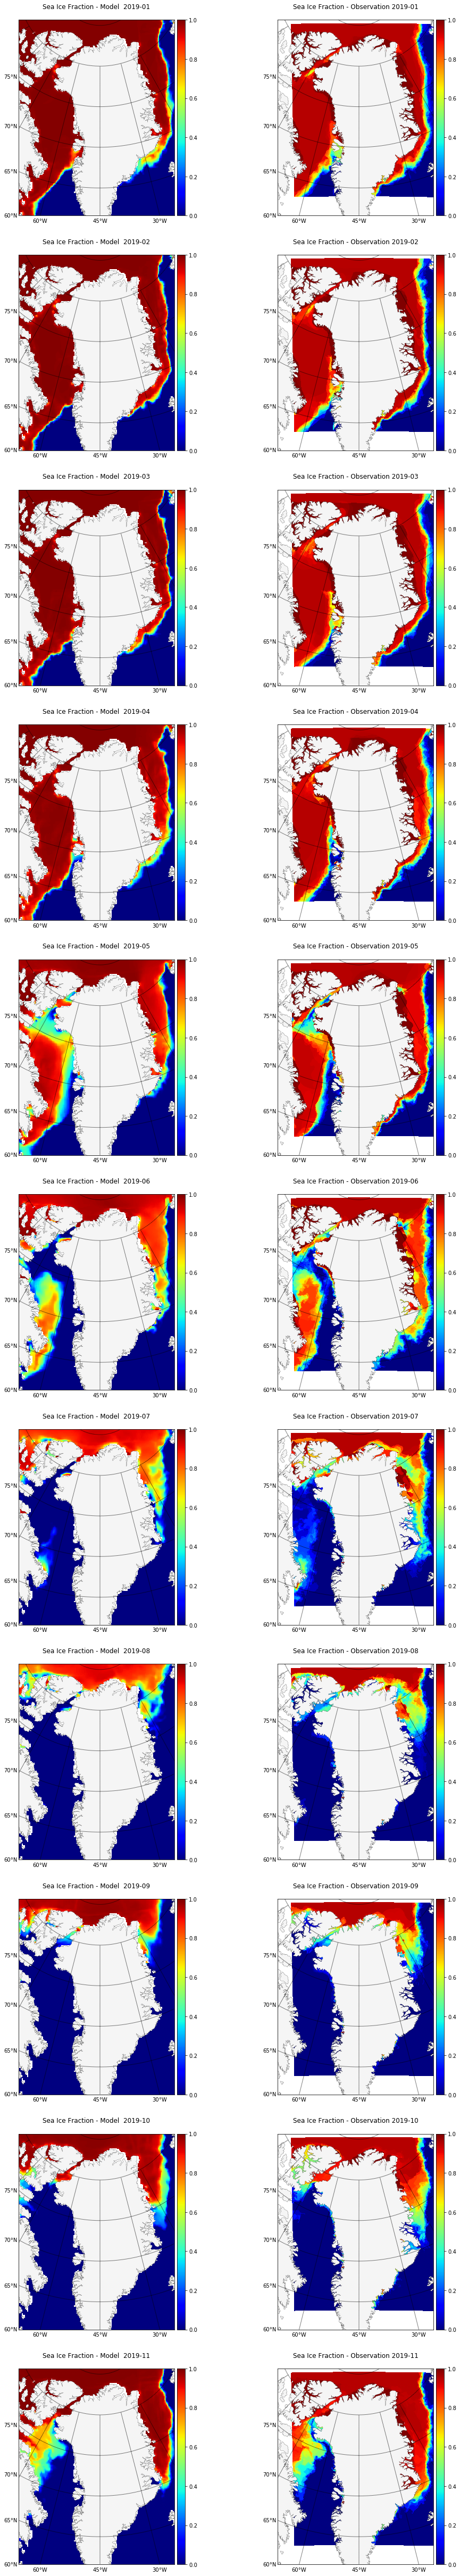

In [31]:
# Input 

sign1=VarFiceModel
sign2=VarFiceObs_means
VarName= 'Sea Ice Fraction'
Minvalues=0
Maxvalues=1

# Create the figure
fig,axes = plt.subplots(11,2, figsize=(16,88)) # 16 is width, 88 is height
axes = axes.ravel() # Convert axes to a flattened 1D array

#Loop on dates to plot data: 

for ti in range(len(sign2.time.values)):  # the length of observation time
 
 ## Model
    date=sign1.time.values[ti].astype('datetime64[M]')
    
    m = Basemap(projection='stere',  ax=axes[ti*2], lat_0=75, lon_0=-45, resolution='l',llcrnrlon=LonMinPlt, llcrnrlat=LatMinPlt,
                urcrnrlon=LonMaxPlt, urcrnrlat=LatMaxPlt)

    # Draw coastlines, country boundaries, fill continents.
    m.drawcoastlines(linewidth=0.25)
    m.drawcountries(linewidth=0.25, color='olive')
    m.fillcontinents(color='whitesmoke')

    # Draw parallels & meridians
    m.drawmeridians(np.arange(30,360,15),labels=[0,0,0,1])
    m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

    # plot the Variable
    im1 = m.pcolormesh(LonModel.values,LatModel.values,sign1[ti,:,:],shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)

    # add colorbar

    Cb = m.colorbar(im1, "right")
    # add a title.
    plt.title( '{} - Model '  ' {}' '\n' .format(VarName,date),fontsize=12)
    
 ## Observation
    date=sign2.time.values[ti].astype('datetime64[M]')

    m = Basemap(projection='stere',  ax=axes[ti*2+1], lat_0=75, lon_0=-45, resolution='l',llcrnrlon=LonMinPlt, llcrnrlat=LatMinPlt,
                urcrnrlon=LonMaxPlt, urcrnrlat=LatMaxPlt)
    
    # Draw coastlines, country boundaries, fill continents.
    m.drawcoastlines(linewidth=0.25)
    m.drawcountries(linewidth=0.25, color='olive')
    m.fillcontinents(color='whitesmoke')
    
    # Draw parallels & meridians
    m.drawmeridians(np.arange(30,360,15),labels=[0,0,0,1])
    m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

    # plot the Variable (the variable is divided per 100 to be comprised between 0 & 1)
    im1 = m.pcolormesh(LonObs.values,LatObs.values,sign2[ti,:,:]/100,shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)
    # add colorbar
    Cb = m.colorbar(im1, "right")
    
    # add a title.
    plt.title( '{} - Observation'  ' {}' '\n' .format(VarName,date),fontsize=12)

#Save file
FOutName = '{}/plot_{}_Model_&_Obs_2019.png'.format(PathOut,VarName)
print('Save file:', FOutName)
plt.savefig(FOutName)

plt.show()

<div class="alert alert-block alert-info">

We can see that in general there is very good agreement between the reanalysis and the observation products. Remember that the monthly observation sea ice fraction is an average of 8-9 values per month (Two weekly values).

## 6.2. Comparison in August 2019
In this section we will explore the two products used in the previous section and the METNO-ARC-SEAICE_CONC-L4-NRT-OBS product presented in [section 2.2](#2.2.-Satellite-observation-product).

In the previous section we have already loaded the data from the DMI observation product, so we are not going to do it again in this section. We will load the data from the file: METNO-ARC-SEAICE_CONC-L4-NRT-OBS_1602232339232.nc

### 6.2.1. Select the netCDF file and variable name

In [32]:
#### Netcdf file

RootPath = 'data/'

# File
FNameObs2=RootPath + 'METNO-ARC-SEAICE_CONC-L4-NRT-OBS_1602232339232.nc'

#  Variable Name
VarNameFice_obs='ice_concentration'

## Open the netCDF file with xr.open_dataset and store the dataset in FIn
FInObs2 = xr.open_dataset(FNameObs2);


### 6.2.2. Open and store the file variables of interest

In order to plot the variables of interest, we will need the `time` coordinate but also the `latitude` and `longitude` coordinates and the  `ice_concentration` variable for the second observation product.

In [33]:
## Store the variables of interest in individual arrays
#Get the variable VarName and associated coordinates and attributes
VarFiceObs2=FInObs2[VarNameFice_obs] # for Obs

In the code cell below, we store the content of the `latitude`,`longitude` variables in `LatObs2`, `LonObs2` for the second observation product:

In [34]:
# for Observation2
LatObs2=np.squeeze(FInObs2['lat'])
LonObs2=np.squeeze(FInObs2['lon'])

We close the dataset 'FInObs2' to spare memory:

In [35]:
## Close the FIn dataset to free memory
FInObs2.close()

### Monthly means for observation data

As explained earlier, the METNO product is produced daily:

In [36]:
VarFiceObs2.time.values

array(['2019-08-01T14:00:00.000000000', '2019-08-02T14:00:00.000000000',
       '2019-08-05T14:00:00.000000000', '2019-08-06T14:00:00.000000000',
       '2019-08-07T14:00:00.000000000', '2019-08-08T14:00:00.000000000',
       '2019-08-09T14:00:00.000000000', '2019-08-12T14:00:00.000000000',
       '2019-08-13T14:00:00.000000000', '2019-08-14T14:00:00.000000000',
       '2019-08-15T14:00:00.000000000', '2019-08-16T14:00:00.000000000',
       '2019-08-19T14:00:00.000000000', '2019-08-20T14:00:00.000000000',
       '2019-08-21T14:00:00.000000000', '2019-08-22T14:00:00.000000000',
       '2019-08-23T14:00:00.000000000', '2019-08-26T14:00:00.000000000',
       '2019-08-27T14:00:00.000000000', '2019-08-28T14:00:00.000000000',
       '2019-08-29T14:00:00.000000000', '2019-08-30T14:00:00.000000000'],
      dtype='datetime64[ns]')

To compare the METNO & DMI oservations to the model values, they need to be on the same temporal resolution. We have already computed monthly averages for the DMI product. We are going to resample the METNO observation product down to a monthly mean for August 2019.:

In [37]:
VarFiceObs2_means = VarFiceObs2.resample(time='m').mean()

Let's check the new time dimension of the observation variables:

In [38]:
VarFiceObs2_means.time.values

array(['2019-08-31T00:00:00.000000000'], dtype='datetime64[ns]')

### 6.2.3. Generate, show and save the plots
#### 6.2.3.1. Plot with the two observation products and model

The cell below generates a figure with three columns: one per product type. 

Save file: out/comparison_obs_model/plot_Sea Ice Fraction_Model_&_Obs_2019-08.png


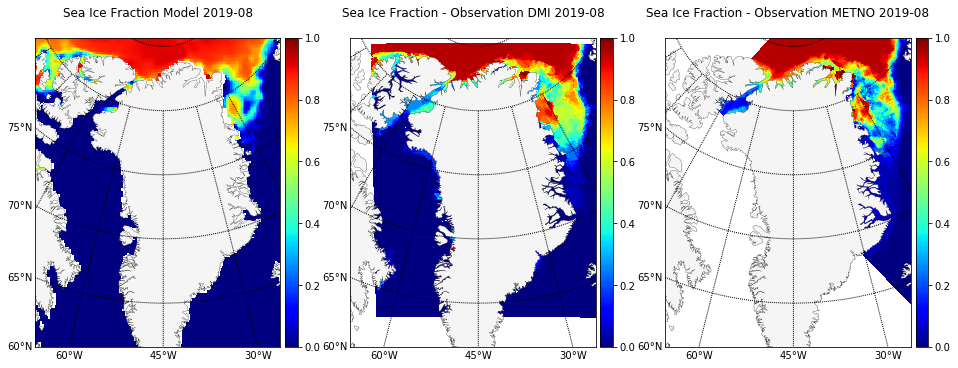

In [39]:
# Input 

sign1=VarFiceModel
sign2=VarFiceObs_means
sign3=VarFiceObs2_means

VarName= 'Sea Ice Fraction'
Minvalues=0
Maxvalues=1
ti=7 # Indices corresponding to August month

# Define the plotting window to center on Greenland
LatMinPlt = 60
LatMaxPlt = 80
LonMinPlt = -65
LonMaxPlt = 20 

# Create the figure
fig,axes = plt.subplots(1,3, figsize=(16,88)) # 16 is width, 88 is height
axes = axes.ravel() # Convert axes to a flattened 1D array

## Model
date=sign1.time.values[ti].astype('datetime64[M]')

m = Basemap(projection='stere',  ax=axes[0], lat_0=75, lon_0=-45, resolution='l',llcrnrlon=LonMinPlt, llcrnrlat=LatMinPlt,
                urcrnrlon=LonMaxPlt, urcrnrlat=LatMaxPlt)


# Draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25, color='olive')
m.fillcontinents(color='whitesmoke')

# Draw parallels & meridians
m.drawmeridians(np.arange(30,360,15),labels=[0,0,0,1])
m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

# plot the Variable
im1 = m.pcolormesh(LonModel.values,LatModel.values,sign1[ti,:,:],shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)

# add colorbar

Cb = m.colorbar(im1, "right")
# add a title.
plt.title( '{} Model' ' {}' '\n' .format(VarName,date),fontsize=12)
    

## Observation 1
date=sign2.time.values[ti].astype('datetime64[M]')

m = Basemap(projection='stere',  ax=axes[1], lat_0=75, lon_0=-45, resolution='l',llcrnrlon=LonMinPlt, llcrnrlat=LatMinPlt,
                urcrnrlon=LonMaxPlt, urcrnrlat=LatMaxPlt)

# Draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25, color='olive')
m.fillcontinents(color='whitesmoke')
    
# Draw parallels & meridians
m.drawmeridians(np.arange(30,360,15),labels=[0,0,0,1])
m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

# plot the Variable (the variable is divided per 100 to be comprised between 0 & 1)
im1 = m.pcolormesh(LonObs.values,LatObs.values,sign2[ti,:,:]/100,shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)
# add colorbar
Cb = m.colorbar(im1, "right")
    
# add a title.
plt.title( '{} - Observation DMI'  ' {}' '\n' .format(VarName,date),fontsize=12)


## Observation 2
date=sign2.time.values[ti].astype('datetime64[M]')

m = Basemap(projection='stere',  ax=axes[2], lat_0=75, lon_0=-45, resolution='l',llcrnrlon=LonMinPlt, llcrnrlat=LatMinPlt,
                urcrnrlon=LonMaxPlt, urcrnrlat=LatMaxPlt)

# Draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25, color='olive')
m.fillcontinents(color='whitesmoke')
    
# Draw parallels & meridians
m.drawmeridians(np.arange(30,360,15),labels=[0,0,0,1])
m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

# plot the Variable (the variable is divided per 100 to be comprised between 0 & 1)
im1 = m.pcolormesh(LonObs2.values,LatObs2.values,sign3[0,:,:]/100,shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)
# add colorbar
Cb = m.colorbar(im1, "right")
    
# add a title.
plt.title( '{} - Observation METNO'  ' {}' '\n' .format(VarName,date),fontsize=12)

#Save file
FOutName = '{}/plot_{}_Model_&_Obs_{}.png'.format(PathOut,VarName,sign2.time.values[ti].astype('datetime64[M]'))
print('Save file:', FOutName)
plt.savefig(FOutName)

plt.show()

<div class="alert alert-block alert-info">

We can see that in general there is very good agreement between the reanalysis and the observation products. We notice that the geographic hold of the METNO products is different from the DMI one. So let's compare the model product to the METNO observation product on a more appropriate area.

#### 6.2.3.2. Plot with the second observation product and model

Save file: out/comparison_obs_model/plot_Sea Ice Fraction_Model_&_Obs.png


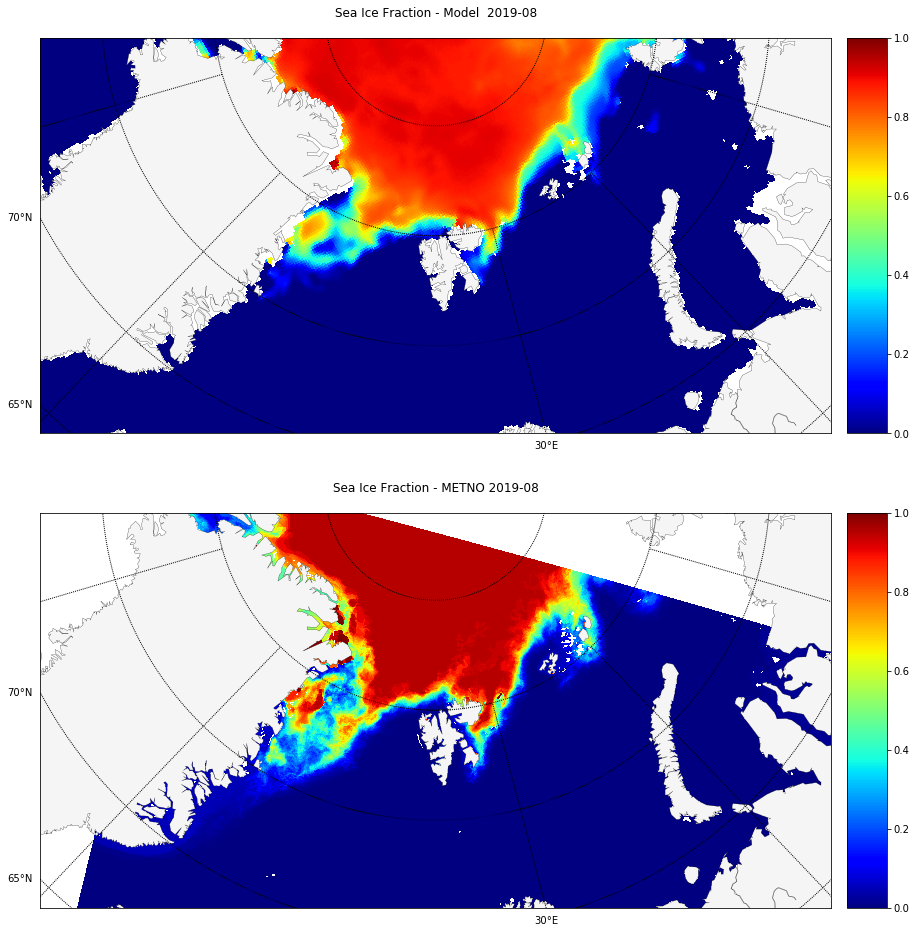

In [40]:
# Input 
sign1=VarFiceModel
sign2=VarFiceObs2_means


VarName= 'Sea Ice Fraction'
Minvalues=0
Maxvalues=1
ti=7 # correspond to month of August

# Create the figure
fig,axes = plt.subplots(2,1, figsize=(16,16)) # 16 is width, 16 is height
axes = axes.ravel() # Convert axes to a flattened 1D array

#Loop on dates to plot data: 
 
 ## Model
date=sign1.time.values[ti].astype('datetime64[M]')

m = Basemap(width=4000000,height=2000000,projection='stere',  ax=axes[0], lat_0=80, lon_0=15, resolution='l')


# Draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25, color='olive')
m.fillcontinents(color='whitesmoke')

# Draw parallels & meridians
m.drawmeridians(np.arange(30,360,30),labels=[0,0,0,1])
m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

# plot the Variable
im1 = m.pcolormesh(LonModel.values,LatModel.values,sign1[ti,:,:],shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)

# add colorbar

Cb = m.colorbar(im1, "right")
# add a title.
plt.title( '{} - Model '  ' {}' '\n' .format(VarName,date),fontsize=12)
    

## Observation 2
date=sign2.time.values[0].astype('datetime64[M]')

m = Basemap(width=4000000,height=2000000,projection='stere',  ax=axes[1], lat_0=80, lon_0=15, resolution='l')

# Draw coastlines, country boundaries, fill continents.
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25, color='olive')
m.fillcontinents(color='whitesmoke')
    
# Draw parallels & meridians
m.drawmeridians(np.arange(30,360,30),labels=[0,0,0,1])
m.drawparallels(np.arange(60,90,5),labels=[1,0,0,0])

# plot the Variable (the variable is divided per 100 to be comprised between 0 & 1)
im1 = m.pcolormesh(LonObs2.values,LatObs2.values,sign2[0,:,:]/100,shading='flat',cmap=plt.cm.jet,latlon=True,vmin=Minvalues, vmax=Maxvalues)
# add colorbar
Cb = m.colorbar(im1, "right")
    
# add a title.
plt.title( '{} - METNO'  ' {}' '\n' .format(VarName,date),fontsize=12)

#Save file
FOutName = '{}/plot_{}_Model_&_Obs.png'.format(PathOut,VarName)
print('Save file:', FOutName)
#plt.savefig(FOutName)

plt.show()

<div class="alert alert-block alert-info">

The METNO product has a better resolution than the model product and provides information in the fjords where the model is not defined. In general both products identify the same features. The model product has smoother transitions between different sea ice coverage regions and tends to underestimate the sea ice coverage where the observation products show maximum values.

# 7. Conclusion
[Go back to the "Table of contents"](#Table-of-contents)

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS</b><br>
  
--- 

#### And thank you for your attention! :) We hope you enjoyed this training on the physical Arctic model data provided by Copernicus Marine Service, for free, thanks to the European Commission.

#### Now let's try to download new data and variables and to access and visualize them. You can try to make new maps and plots. And don't forget to try to the other [Copernicus Marine Arctic products](http://marine.copernicus.eu/services-portfolio/access-to-products/?option=com_csw&task=results)!

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). 